# Heart failure : Data Analysis and Prediction

*by Chandrima Ghatak, December 13, 2021* 

## Introduction

In recent years, machines have showed the ability to learn and even master tasks that were thought to be extremely complicated, showing that machine learning algorithms are potentially useful elements of detection and decision support systems. Another exciting point is the finding that in some situations, computers seem to be able to observe patterns that are beyond human perception. This had led to a lot of implementations of machine learning in the field of medical science and research. Especially interesting in the use of supervised learning methods to predict potentially fatal conditions in patients.

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 32% of all deaths worlwide as per the World Health Organization(WHO)[1]. Coming from the Indian Subcontinent, our diet has always been heavy on oily food and carbohydrates due to a lot of cultural and socio-economic reasons. There is general tendency among people to ignore health and a lot of people there suffer from CVDs. Heart failure is a common event caused by CVDs and being able to predict a possible fatal scenario via machine learning algorithms can save lot of lives in a place where most people never get the chance to reach a hospital in case of a heart attack due to scarcity of quality medical infrastructure around the subcontinent and traffic in general. The dataset[2] we use contains 12 features from 299 patients that can be used to predict mortality by heart failure. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a supervised machine learning model can be of great help.

In this project we analyze our dataset and construct an Artificial Neural Network Classifier to predict mortality. Using different optimization methods, learning rates, hidden layer structures, and epochs, we will come up with the parameters for the neural network having the highest accuracy. We also compare probabilistic approach neural networks to deterministic approachs such as K Neighbours Classifier, Decision Tree Classifier, Random Forest Classifier, and LightGBM Classifier, to find which approach gives the better prediction. Additonally, we compare the results for our machine learning algorithms with and without feature selection.

# Methods

In this project, we analyze a dataset [1] of 299 patients with some having heart failure events collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The dataset contains 13 features, which report clinical and lifestyle information. Some features are binary: anaemia, high blood pressure, diabetes, sex, and smoking, while others such as serum creatinine, serum sodium and platelet count are non binary values. Regarding the features, the creatinine phosphokinase (CPK) states the level of the CPK enzyme in blood. When a muscle tissue gets damaged, CPK flows into the blood. Therefore, high levels of CPK in the blood of a patient might indicate a heart failure or injury. The ejection fraction states the percentage of how much blood the left ventricle pumps out with each contraction. Sodium is a mineral that serves for the correct functioning of muscles and nerves. An abnormally low level of sodium in the blood might be cause heart failure. The death event feature, that we use as the target in our classification study, states if the patient died or survived before the end of the follow-up period.

Firstly we explore our dataset and analyze the features or attributes of our dataset to find which features have higher correlation to death events. Then we perform feature selection to pick features which have higher degree of correlation to mortality and apply different machine learning classifier algorithms with and without feature selection to compare the outcomes of each model with and without feature selection.

#### Importing Libraries we need

In [82]:
import numpy as np
import optimizers as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings("ignore")

import lightgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
colors = ['#42d4f5', '#42f5b6', '#426cf5', '#a5e6c3']

#### Lets Explore the dataset

In [83]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv', delimiter=',')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


We can see our dataset has 13 features. The first 12 features are used as attributes for predicting Death Event our last feature in our dataset. Here are few details of each individual feature :

* Anemia - 0 = Non Anaemic, 1  = Anaemic
* Creatinine Phosphokinase - Level of CPK in blood (mcg/L)
* Diabetes - 0 = Non Diabetic, 1 = Diabetic
* Ejection Fraction - Percentage of blood leaving the blood at each contraction
* High Blood Pressure - 0 = False, 1 = True
* Platelets - Platelets in blood (kiloplatelets/mL)
* Serum Creatinine - Level of creatinine in blood (mg/dL)
* Serum Sodium - Level of sodium in blood (mEq/L)
* Sex - 0 = Female, 1 = Male
* Smoking - 0 = Non Smoker, 1 = Smoker
* Time - Follow up period (days)
* Death Event - 0 = Surviving, 1 = Passed Away

### Analysis of Our Data

We check our dataset for null values, which we see there is none.

In [84]:
# Checking for null values
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We visualize the age distribution of patients in our dataset

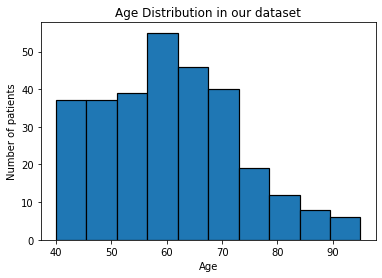

In [6]:
# age distribution

hist_data =[heart_data["age"].values]
 
plt.hist(hist_data, edgecolor='black', linewidth=1.2)
plt.title("Age Distribution in our dataset")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.show()

From our age distribution plot we can see that the patients in our dataset are aged between 40-95 years, mostly falling in the 50-70 age group.

Next we plot a histogram to see how age is related to death events

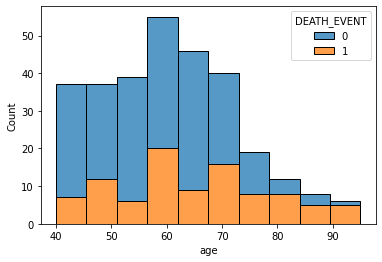

In [7]:
plt.figure()
sns.histplot(data = heart_data, x= "age", hue = "DEATH_EVENT", multiple="stack")
plt.show()

From the above histogram we can see there is a higher number of death events in older people compared to younger people. Simply put, the chance of survival is higher for young people than older people. A cursory glance at the histogram suggests that age might be coorelated to death events.

Now we plot a box to see how age and gender are related to death events

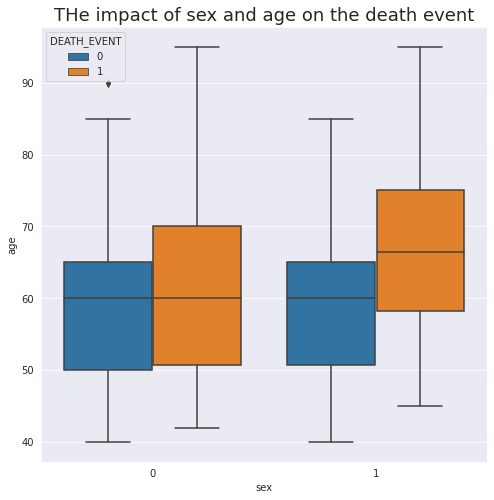

In [198]:
plt.figure(figsize=(8,8))
sns.boxplot(data = heart_data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("THe impact of sex and age on the death event", fontsize=18)
plt.show()

In the above plot, sex 0 denotes a female, while 1 denotes a male, while 0 for death events denotes survival while 1 marks death events. By a quick glance it does not seem gender is realted to death events, but we can conclude from our findings that people of higher age usually have more death events. However, males and females have almost a same median survival age, but males tend to die at an older age.

We now plot a distribution of time on survival status

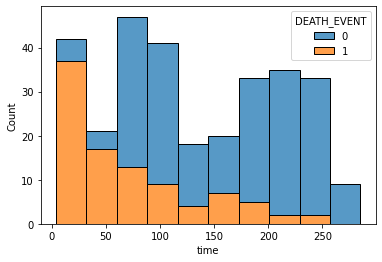

In [9]:
plt.figure()
sns.histplot(data = heart_data, x= "time", hue = "DEATH_EVENT", multiple="stack")
plt.show()

We can see that most death events were recorded in the early days, which is a clear indication that early intervention and treatment can prevent CVD related deaths like heart attacks. It also indicated time is an important factor in determining survival status. 

#### Pie-chart analysis of binary data in dataset

Here we have some pie charts for some data in the dataset. It gives us an opportunity to get an idea of whether some the data is related to death events.

Diabetes distribution in the dataset along with death analysis

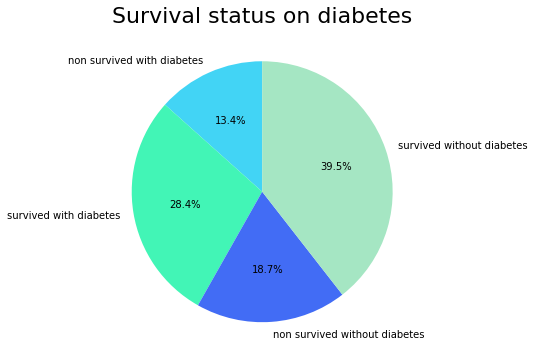

In [10]:
# Analyzing the survival status on diabetes

with_diabetes = heart_data[heart_data["diabetes"]==1]
without_diabetes = heart_data[heart_data["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(with_diabetes[with_diabetes["DEATH_EVENT"]==1]), len(with_diabetes[with_diabetes["DEATH_EVENT"]==0]), \
                len(without_diabetes[without_diabetes["DEATH_EVENT"]==1]),len(without_diabetes[without_diabetes["DEATH_EVENT"]==0])]
diabetes_labels = ["non survived with diabetes","survived with diabetes","non survived without diabetes", "survived without diabetes"]

plt.figure(figsize=(6,6))
plt.pie(diabetes_data, labels = diabetes_labels, startangle=90, autopct='%.1f%%', colors = colors)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

We have pie chart of anaemic and non anaemic people along with survival status

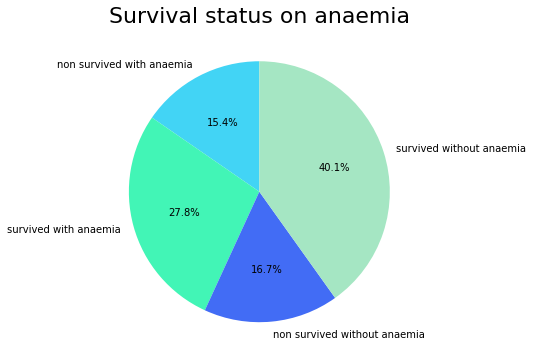

In [11]:
# Analyzing the survival status on anaemia

with_anaemia = heart_data[heart_data["anaemia"]==1]
without_anaemia = heart_data[heart_data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(with_anaemia[with_anaemia["DEATH_EVENT"]==1]), len(with_anaemia[with_anaemia["DEATH_EVENT"]==0]), \
                len(without_anaemia[without_anaemia["DEATH_EVENT"]==1]),len(without_anaemia[without_anaemia["DEATH_EVENT"]==0])]
anaemia_labels = ["non survived with anaemia","survived with anaemia","non survived without anaemia",\
              "survived without anaemia"]

plt.figure(figsize=(6,6))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90, colors = colors)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

We have pie chart of people with and without high blood pressure along with survival status

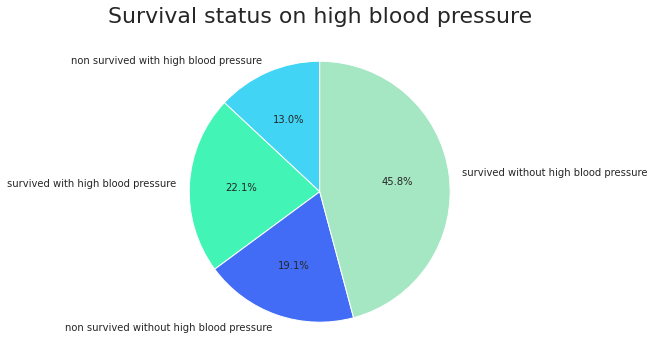

In [192]:
# Analyzing the survival status on high blood pressure

with_high_blood_pressure = heart_data[heart_data["high_blood_pressure"]==1]
without_high_blood_pressure = heart_data[heart_data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]),\
                 len(with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]), \
                len(without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]),\
                 len(without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0])]
high_blood_pressure_labels = ["non survived with high blood pressure","survived with high blood pressure",\
                   "non survived without high blood pressure","survived without high blood pressure"]

plt.figure(figsize=(6,6))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, startangle=90, autopct='%.1f%%', colors = colors)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

We have pie chart of people who did and did not smoke along with survival status

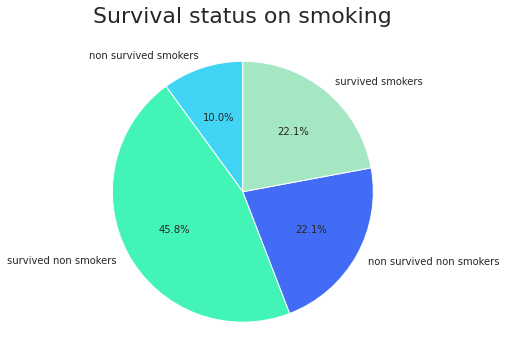

In [193]:
# Analyzing the survival status on smoking
smokers = heart_data[heart_data["smoking"]==1]
non_smokers = heart_data[heart_data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(smokers[smokers["DEATH_EVENT"]==1]), len(non_smokers[non_smokers["DEATH_EVENT"]==0]), \
                len(non_smokers[non_smokers["DEATH_EVENT"]==1]),len(smokers[smokers["DEATH_EVENT"]==0])]
smoking_labels = ["non survived smokers","survived non smokers","non survived non smokers","survived smokers"]

plt.figure(figsize=(6,6))
plt.pie(smoking_data, labels = smoking_labels, startangle=90, autopct='%.1f%%', colors = colors)
plt.title("Survival status on smoking", fontsize=22)
plt.show()

#### Feature selection

Feature selection in a dataset for classification can be of great importance in imporving the accuracy of machine learning algorithms as it helps us get rid of noise in a dataset and work with the data that is most relevant to predict our outcome, as it has been pointed out by Chicco and Gurman in their paper[2] that only a few key attributes can give better predictions than using all the attributes in a dataset. So we test all our machine learning algorithms for 2 different attribute sets, firstly using all 12 attributes in the dataset and then using only attributes that are highly correlated to death events as our target for the classification.

Our graphical analysis of the dataset did provide some interseting insights into the dataset and we concluded that age and time may be highly correlated to mortality. However it alone cannot justify selecting those features. There are lot of other methods for feature selection and heatmaps are interesting approach. The code block below gives a heatmap for our dataset so that we can find correlations between different features or attributes.

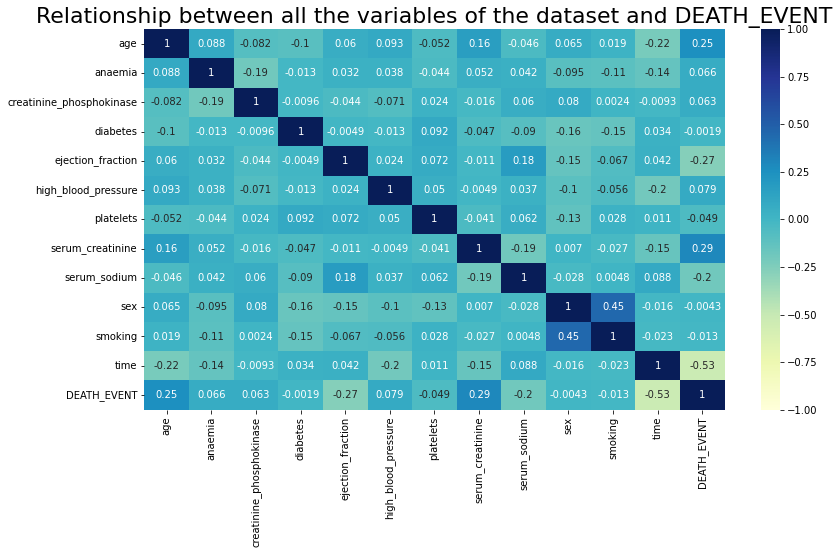

In [14]:
plt.figure(figsize=(13,7))
sns.heatmap(heart_data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()

From the above heatmap we can see that the attributes serum creatinine and age are highly positively correlated to death events, also time and ejection fraction have high negative correlation to death events. So we select these four attributes as features for comparing our machine learning alogirthms with and without feature selection.

Now, we define functions for splitting our dataset into training and testing and  also functions to find percentage error on our predicted results. We define two arrays to store the best accuracies for our different machine learning approaches with and without feature selection

In [219]:
def partition(X, T, train_fraction):
    n_samples = X.shape[0]
    rows = np.arange(n_samples)
    np.random.shuffle(rows)
    
    n_train = round(n_samples * train_fraction)
    
    Xtrain = X[rows[:n_train], :]
    Ttrain = T[rows[:n_train], :]
    Xtest = X[rows[n_train:], :]
    Ttest = T[rows[n_train:], :]
    
    return Xtrain, Ttrain, Xtest, Ttest

def rmse(T, Y):
    return np.sqrt(np.mean((T - Y)**2))


def percent_correct(Y, T):
    return np.mean(T == Y) * 100

accuracy_1 = []
accuracy_2 = []

Now, for our binary classification we allocate the data into input and output arrays

In [200]:
X = heart_data.iloc[:,:12]
X.shape

(299, 12)

In [201]:
Y = heart_data.iloc[:,12:]
Y.shape

(299, 1)

In [202]:
Features = ['serum_creatinine', 'age', 'time', 'ejection_fraction']
X1 = heart_data[Features]
X1.shape

(299, 4)

X stores all our input parameters, Y is for out desired outputs, X1 is for only the four selected features as input parameters, ejection fraction, serum creatinine, age and time

In [203]:
X = np.array(X)
Y = np.array(Y)
X1 = np.array(X1)

Now, we split our data into training and testing sets. 

In [204]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, Y, 0.8)

In [205]:
X1train, T1train, X1test, T1test = partition(X1, Y, 0.8)

Since we will use modules from skikit learn for our deterministic machine learning models, we need to standardize the data we supply to these models. The standardization for our Atrificial Neural Network is taken care by the code in NeuralNetworks itself

In [206]:
# Data scaling
scaler = StandardScaler()
Xtrain_s = scaler.fit_transform(Xtrain)
Xtest_s = scaler.transform(Xtest)

X1train_s = scaler.fit_transform(X1train)
X1test_s = scaler.transform(X1test)

#### Artificial Neutral Networks

We import the classification code from our assignment A3 from our class, which also used the optimizers from class

In [207]:
import neuralnetworks as nn

Now, while using all 12 parameters for training, we experiment with all the three optimizer methods, namely, sgd, adam and scg. We also apply different learning rates, number of epochs and hidden layer structures and find the rmse and accuracy for each different scenario and store the results.

In [220]:
methods = ['sgd', 'adam', 'scg']
lrs = [0.1, 0.01, 0.001]
epochs = [10, 50, 100]
hiddens = [[], [12], [12,12]]
c = []
results = []
acc = []
for n_hidden_layer in hiddens:
    for epoch in epochs:
        for lr in lrs:
            for m in methods:
                nnet = nn.NeuralNetworkClassifier(12, n_hidden_layer, 2)
                nnet.train(Xtrain, Ttrain, epoch, method = m, learning_rate = lr, verbose = False)
                Ytest = nnet.use(Xtest)[0]
                a = percent_correct(Ytest, Ttest)
                acc.append(a)
                c.append(Ytest)
                result = [n_hidden_layer, epoch, lr, m, a]
                results.append(result)
results_df = pd.DataFrame(results, columns=['hidden_layers', 'epochs', 'learning_rate', 'optimizer_method', 'AVG_ACC_Test'])

In [221]:
results_df

,hidden_layers,epochs,learning_rate,optimizer_method,AVG_ACC_Test
0,[],10,0.100,sgd,80.000000
1,[],10,0.100,adam,81.666667
2,[],10,0.100,scg,85.000000
3,[],10,0.010,sgd,68.333333
4,[],10,0.010,adam,73.333333
...,...,...,...,...,...
76,"[12, 12]",100,0.010,adam,78.333333
77,"[12, 12]",100,0.010,scg,75.000000
78,"[12, 12]",100,0.001,sgd,75.000000
79,"[12, 12]",100,0.001,adam,81.666667


Now, using only the four features from our feature selection, ejection fraction, serum creatinine, age and time for training, we experiment with all the three optimizer methods, namely, sgd, adam and scg. We also apply different learning rates, number of epochs and hidden layer structures and find the rmse and accuracy for each different scenario and store the results

In [222]:
methods = ['sgd', 'adam', 'scg']
lrs = [0.1, 0.01, 0.001]
epochs = [5, 10, 50]
hiddens = [[], [12], [12,12]]
results1 = []
acc1 = []
d = []
for n_hidden_layer in hiddens:
    for epoch in epochs:
        for lr in lrs:
            for m in methods:
                nnet1 = nn.NeuralNetworkClassifier(4, n_hidden_layer, 2)
                nnet1.train(X1train, T1train, epoch, method = m, learning_rate = lr, verbose = False)
                Y1test = nnet1.use(X1test)[0]
                a1 = percent_correct(Y1test, T1test)
                acc1.append(a1)
                d.append(Y1test)
                result1 = [n_hidden_layer, epoch, lr, m, a1]
                results1.append(result1)
results_df1 = pd.DataFrame(results1, columns=['hidden_layers', 'epochs', 'learning_rate', 'optimizer_method', 'AVG_ACC_Test'])

In [223]:
results_df1

,hidden_layers,epochs,learning_rate,optimizer_method,AVG_ACC_Test
0,[],5,0.100,sgd,80.000000
1,[],5,0.100,adam,81.666667
2,[],5,0.100,scg,81.666667
3,[],5,0.010,sgd,55.000000
4,[],5,0.010,adam,76.666667
...,...,...,...,...,...
76,"[12, 12]",50,0.010,adam,81.666667
77,"[12, 12]",50,0.010,scg,90.000000
78,"[12, 12]",50,0.001,sgd,61.666667
79,"[12, 12]",50,0.001,adam,76.666667


#### K Neighbours Classifier

We use K Neighbours Classifier from the skikit learn module [6] as our second machine learning approach on the dataset. Since our dataset is not that large, we should not run into common issues of slow execution as is often observed with K Neighbours Classifier. We use the algorithm for both our attribute sets, looping through different number of neighbours while keeping all other parameters to their default values. We train the model and calculate the accuracies while using all the features and also applying to the selected features from our feature selection and append the accuracies to our list.

In [224]:
# K Neighbors Classifier for all 12 attributes
a = []
b = []
for i  in range(1,30):
    kn_clf = KNeighborsClassifier(n_neighbors=i)
    kn_clf.fit(Xtrain_s, Ttrain)
    kn_pred = kn_clf.predict(Xtest_s)
    kn_acc = accuracy_score(Ttest, kn_pred)
    b.append(kn_pred)
    a.append(kn_acc)
q = max(a)
w = a.index(q)
kn_pred = b[w]
kn_acc = q
accuracy_1.append(100*q)

# K neighbors Classifier for selected attributes
a = []
b = []
for i  in range(1,30):
    kn_clf = KNeighborsClassifier(n_neighbors=i)
    kn_clf.fit(X1train_s, T1train)
    kn_pred1 = kn_clf.predict(X1test_s)
    kn_acc1 = accuracy_score(T1test, kn_pred1)
    b.append(kn_pred1)
    a.append(kn_acc1)

q = max(a)
w = a.index(q)
kn_pred1 = b[w]
kn_acc1 = q
accuracy_2.append(100*q)

#### Decision Tree Classifier

Now, we use the decision tree classifier from the skikit learn module [7] as our next machine learning algorithm. It is one of the most common predictive machine learning approaches out there and it can take discrete set of values for classification of our dataset. We have different sets of maximum leaf nodes and random states for our algorithm  while all other parameters are default. We use the algorithm while using all the features and also while using the features we selected to train the model and to store is the accuracies of each from our predictions on the testing dataset.

In [225]:
# Decision Tree Classifier for 12 attributes
a = []
b = []
for i  in range(2,20):
    for j in range(0,100):
        dt_clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=j, criterion='entropy')
        dt_clf.fit(Xtrain_s, Ttrain)
        dt_pred = dt_clf.predict(Xtest_s)
        dt_acc = accuracy_score(Ttest, dt_pred)
        b.append(dt_pred)
        a.append(dt_acc)
q = max(a)
w = a.index(q)
dt_pred = b[w]
dt_acc = q
accuracy_1.append(100*q)

# Decision Tree Classifier 2 attributes
a = []
b = []
for i  in range(2,20):
    for j in range(0,100):
        dt_clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=j, criterion='entropy')
        dt_clf.fit(X1train_s, T1train)
        dt_pred1 = dt_clf.predict(X1test_s)
        dt_acc1 = accuracy_score(T1test, dt_pred1)
        b.append(dt_pred1)
        a.append(dt_acc1)
q = max(a)
w = a.index(q)
dt_pred1 = b[w]
dt_acc1 = q
accuracy_2.append(100*q)

#### Random Forest Classifier

Now, we use the random forest classifier form the skikit learn module [8] on both our attribute collections. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting and it is expected to have better accuracies than a decision tree classifier.  The max_depth attribute controls the depth of the tree while the max features controls the features at each split of the dataset. We iterate through different depths of our tree and different random states. All other parameter use their default values. We train our model with the training dataset while using all the features and also the selected features and predict the results and compare it to our test dataset to store the accuracies for each attribute set into the accuracies lists.

In [226]:
# RandomForestClassifier for all 12 attributes
a = []
b = []
for i  in range(1,20):
    for j in range(1,20):
        r_clf = RandomForestClassifier(max_features=0.5, max_depth=i, random_state=j)
        r_clf.fit(Xtrain_s, Ttrain)
        r_pred = r_clf.predict(Xtest_s)
        r_acc = accuracy_score(Ttest, r_pred)
        b.append(r_pred)
        a.append(r_acc)
q = max(a)
w = a.index(q)
r_pred = b[w]
r_acc = q
accuracy_1.append(100*q)

# RandomForestClassifier for 2 attributes
a = []
b = []
for i  in range(1,20):
    for j in range(1,20):
        r_clf = RandomForestClassifier(max_features=0.5, max_depth=i, random_state=j)
        r_clf.fit(X1train_s, T1train)
        r_pred1 = r_clf.predict(X1test_s)
        r_acc1 = accuracy_score(T1test, r_pred1)
        b.append(r_pred1)
        a.append(r_acc1)
q = max(a)
w = a.index(q)
r_pred1 = b[w]
r_acc1 = q
accuracy_2.append(100*q)

#### LightGBM Classifier

As our final classifier algorithm method, we use LightGBM [9] gradient boosting classifier framework on both our attribute sets, with a defined maximum depth and random state to find the best accuracies in each case. LightGBM has very low memory utilization and is much faster than CATboost or XGboost and hence is the preferred framework for use. For our implementation, we once again use a range of depths and random states, as with our previous tree based learning approaches. We train our classifier with our training datasets while using all the features and also using only the four selected feaures and predict the results using our testing dataset,finally we append the accuracies to our accuracy lists. 

In [227]:
#  lightGBM classifier for all 12 attributes
a = []
b = []
for i  in range(1,5):
    for j in range(0,99):
        lgb_clf = lightgbm.LGBMClassifier(max_depth=i, random_state=j)
        lgb_clf.fit(Xtrain_s, Ttrain)
        lgb_pred = lgb_clf.predict(Xtest_s)
        lgb_acc = accuracy_score(Ttest, lgb_pred)
        b.append(lgb_pred)
        a.append(lgb_acc)
q = max(a)
w = a.index(q)
lgb_pred = b[w]
lgb_acc = q
accuracy_1.append(100*q)

#  lightGBM classifier for 2 attributes
a = []
b = []
for i  in range(1,5):
    for j in range(0,99):
        lgb_clf = lightgbm.LGBMClassifier(max_depth=i, random_state=j)
        lgb_clf.fit(X1train_s, T1train)
        lgb_pred1 = lgb_clf.predict(X1test_s)
        lgb_acc1 = accuracy_score(T1test, lgb_pred1)
        b.append(lgb_pred1)
        a.append(lgb_acc1)
q = max(a)
w = a.index(q)
lgb_pred1 = b[w]
lgb_acc1 = q
accuracy_2.append(100*q)

## Results

After running our five different machine learning algorithms on both our sets of attribute choices, we analyze the reuslts for each machine learining algorithm separately and then compare them to each other. 

#### Results and Confusion Matrixes -  Neural Network Classifier

In [231]:
acu = max(acc)
w = acc.index(acu)
Ytest = c[w]
accuracy_1.append(acu)
print("Accuracy of our neural network for all 12 attributes as inputs is :",acu)
acu1 = max(acc1)
w = acc1.index(acu1)
Y1test = d[w]
accuracy_2.append(acu1)
print("Accuracy of our neural network for selected attributes as inputs is :",acu1)

Accuracy of our neural network for all 12 attributes as inputs is : 86.66666666666667
Accuracy of our neural network for selected attributes as inputs is : 91.66666666666666


From our observations, we can see that our neural network classifier had higher accuracy while we have only serum creatinine, ejections fraction, age and time as inputs, instead of using all 12 attributes of our dataset as inputs. Now we have a confusion matrix for both sets of input parameters.

<Figure size 1080x360 with 0 Axes>

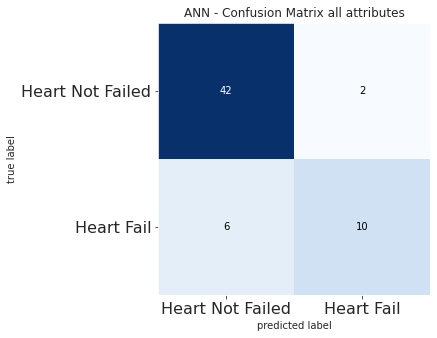

In [229]:
cm = confusion_matrix(Ttest, Ytest)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("ANN - Confusion Matrix all attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<Figure size 1080x360 with 0 Axes>

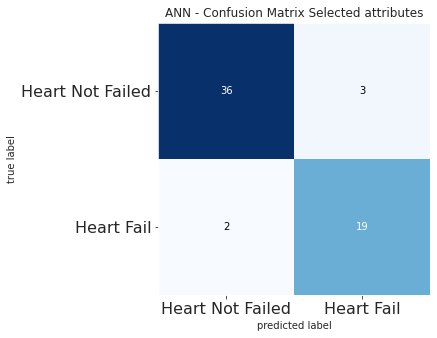

In [232]:
cm = confusion_matrix(T1test, Y1test)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("ANN - Confusion Matrix Selected attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### Results and Confusion Matrixes -  K Neighbours Classifier

In [233]:
print("Accuracy of K Neighbors Classifier for all attributes is : ", "{:.2f}%".format(100* kn_acc))
print("Accuracy of K Neighbors Classifier for selected attributes is : ", "{:.2f}%".format(100* kn_acc1))

Accuracy of K Neighbors Classifier for all attributes is :  76.67%
Accuracy of K Neighbors Classifier for selected attributes is :  86.67%


From our observations, we can see that our K Neighbours classifier had higher accuracy while we have only serum creatinine, ejections fraction, age and time as inputs, instead of using all 12 attributes of our dataset as inputs. Now we have a confusion matrix for both sets of input parameters.

<Figure size 1080x360 with 0 Axes>

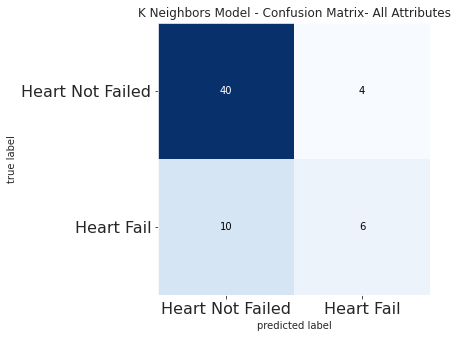

In [234]:
cm = confusion_matrix(Ttest, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix- All Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<Figure size 1080x360 with 0 Axes>

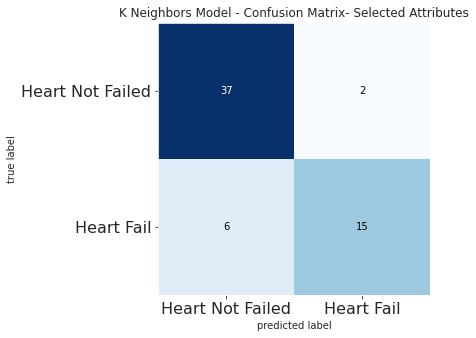

In [235]:
cm = confusion_matrix(T1test, kn_pred1)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix- Selected Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### Results and Confusion Matrixes -  Decision Tree Classifier

In [236]:
print("Accuracy of Decision Tree Classifier for all attributes is : ", "{:.2f}%".format(100* dt_acc))
print("Accuracy of Decision Tree Classifier for selected attributes is : ", "{:.2f}%".format(100* dt_acc1))

Accuracy of Decision Tree Classifier for all attributes is :  85.00%
Accuracy of Decision Tree Classifier for selected attributes is :  86.67%


From our observations, we can see that our Decision Tree classifier had higher accuracy when we have only serum creatinine, ejections fraction, age and time as inputs, than using all 12 attributes of our dataset as inputs. Now we have a confusion matrix for both sets of input parameters.

<Figure size 1080x360 with 0 Axes>

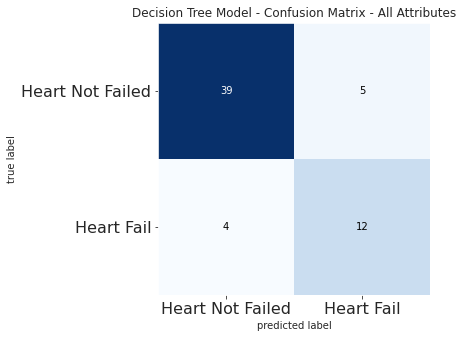

In [237]:
cm = confusion_matrix(Ttest, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix - All Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<Figure size 1080x360 with 0 Axes>

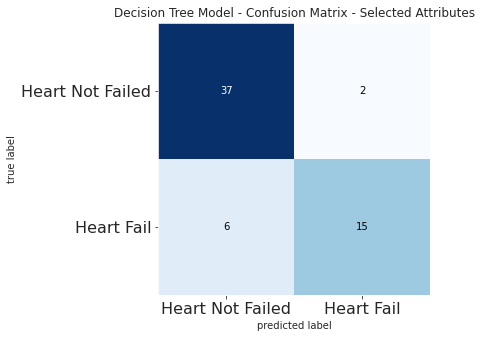

In [238]:
cm = confusion_matrix(T1test, dt_pred1)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix - Selected Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### Results and Confusion Matrixes -  Random Forest Classifier

In [239]:
print("Accuracy of Random Forest Classifier for all attributes is : ", "{:.2f}%".format(100* r_acc))
print("Accuracy of Random Forest Classifier for Selected attributes is : ", "{:.2f}%".format(100* r_acc1))

Accuracy of Random Forest Classifier for all attributes is :  86.67%
Accuracy of Random Forest Classifier for Selected attributes is :  91.67%


From our observations, we can see that our Random Forest classifier had higher accuracy while we have only serum creatinine, ejections fraction, age and time as inputs, instead of using all 12 attributes of our dataset as inputs. Now we have a confusion matrix for both sets of input parameters.

<Figure size 1080x360 with 0 Axes>

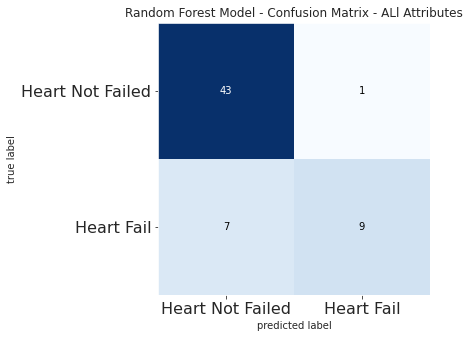

In [240]:
cm = confusion_matrix(Ttest, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix - ALl Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<Figure size 1080x360 with 0 Axes>

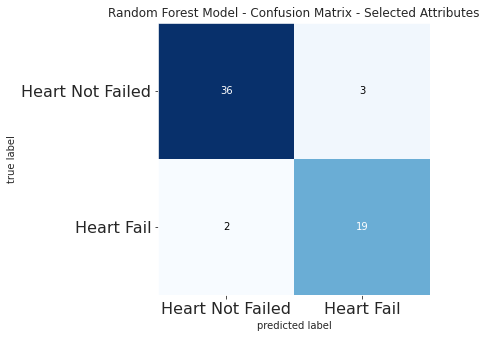

In [241]:
cm = confusion_matrix(T1test, r_pred1)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix - Selected Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### Results and Confusion Matrixes -  LightGBM Classifier

In [242]:
print("Accuracy of LightGBM Classifier for all attributes is : ", "{:.2f}%".format(100* lgb_acc))
print("Accuracy of LightGBM Classifier for Selected attributes is : ", "{:.2f}%".format(100* lgb_acc1))

Accuracy of LightGBM Classifier for all attributes is :  85.00%
Accuracy of LightGBM Classifier for Selected attributes is :  90.00%


From our observations, we can see that our LightGBM Classifier had higher accuracy while we have only serum creatinine, ejections fraction, age and time as inputs, instead of using all 12 attributes of our dataset as inputs. Now we have a confusion matrix for both sets of input parameters.

<Figure size 1080x360 with 0 Axes>

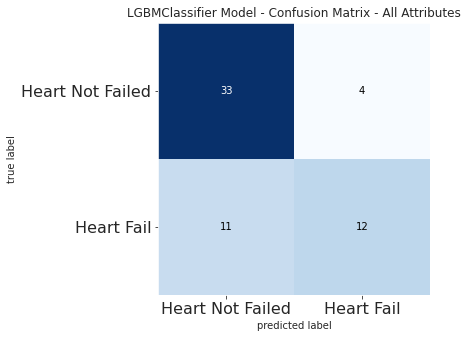

In [186]:
cm = confusion_matrix(Ttest, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix - All Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

<Figure size 1080x360 with 0 Axes>

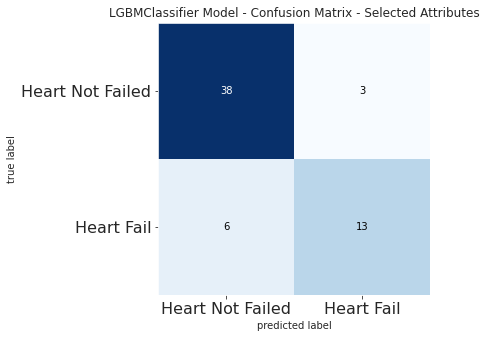

In [187]:
cm = confusion_matrix(T1test, lgb_pred1)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix - Selected Attributes")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [188]:
model_list = ['K Neighbour', 'Decision Tree', 'Random Forest', 'Light GBM', 'ANN']

##### BAR Graph showing performance of different machine learning approaches without feature selection

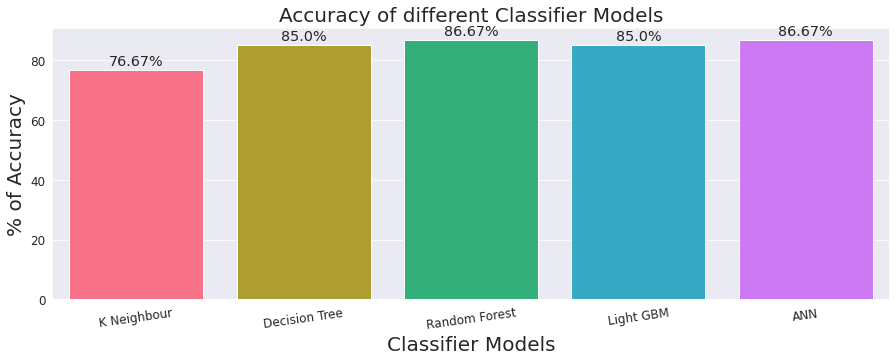

In [251]:
plt.rcParams['figure.figsize']=15,5
sns.set_style('darkgrid')
ax = sns.barplot(x = model_list, y = accuracy_1, palette = "husl", saturation =2.0) 
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

##### BAR Graph showing performance of different machine learning approaches with feature selection

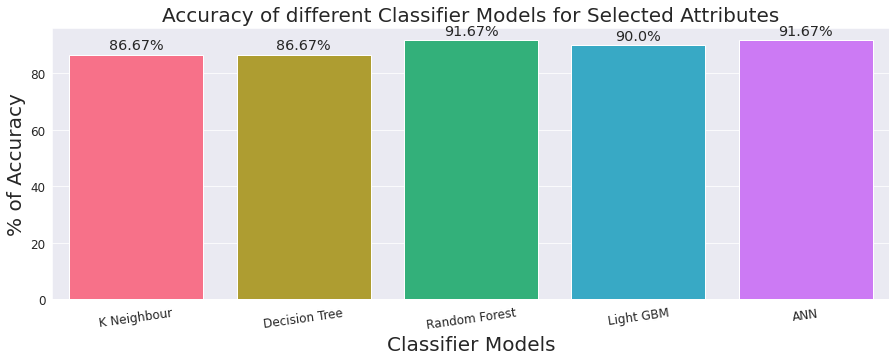

In [252]:
plt.rcParams['figure.figsize']=15,5
sns.set_style('darkgrid')
ax = sns.barplot(x = model_list, y = accuracy_2, palette = "husl", saturation =2.0) 
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models for Selected Attributes', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Conclusion

From the above observations, we can see that all the different machine learning approaches we used for this project give very comparable outputs and it can be used to predict probable fatal outcomes for patients with heart ailments. It can be inferred that if any machine learning approach is optimized and tested, it will, more or less, yield results comparable to other algortihms for our dataset. Additonally, our Neural Network Classifier has a very good accuracy which is comparable to other tree based deterministic methods. Finally, from the above two graphs we can conclude that feature selection is an important tool for machine learning as it can help us eliminate unnecessary noise or unrelated data from a dataset which gives us better accuracy. It solves the problem of over or under fitting to a good extent.

To summarize our outcomes:

* Machine learning can be an important tool in the field of medicine. It can assist medical practitioners and can be used to predict death or survival chances in patients given a set of medical conditions. This can help in early intervention and can save a lot of lives.
* Probabilistic and deterministic approaches to machine learning yield comparable results 
* All attributes in a given dataset does not always relate to outcome, nor the notion that more data will yield better prediction. Filtering of data and choosing the correct set of features to apply machine learning approaches gives the best outcome.

## References

* [1] https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
* [2] The dataset used in this project is publicly available under the Creative Commons Attribution 4.0 International (CC BY 4.0) license at: https://plos.figshare.com/articles/Survival_analysis_of_heart_failure_patients_A_case_study/5227684/1
* [3] Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). 
https://doi.org/10.1186/s12911-020-1023-5 
* [4] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001#references
Ahmad, Tanvir; Munir, Assia; Bhatti, Sajjad Haider; Aftab, Muhammad; Ali Raza, Muhammad (2017): DATA_MINIMAL.. PLOS ONE. Dataset. https://doi.org/10.1371/journal.pone.0181001.s001 
* [5] https://github.com/plotly/plotly.py Python Plots
* [6] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
K Neighbours Classifier
* [7] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
Decision Tree Classifier
* [8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
Random Forest Classifier
* [9] https://lightgbm.readthedocs.io/en/latest/ 
LightGBM Classifier

In [1]:
import io
import nbformat
import glob
nbfile = glob.glob('Project_Ghatak.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Project_Ghatak.ipynb is 2826
